In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)





In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

Text(0.5, 1.0, 'Precipitation Score by Date')

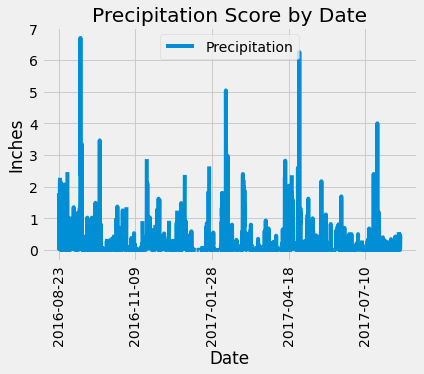

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23)-dt.timedelta(days=365)
last_year
# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()
result

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(result,columns = ["Date","Precipitation"])


# Sort the dataframe by date
sorted_df = df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(x = "Date", y = "Precipitation")
plt.xticks(rotation = 90);
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Score by Date")



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
data_count = func.count(Measurement.station)

In [15]:
# Design a query to calculate the total number stations in the dataset
total_count_stations = session.query(func.count((Measurement.station).distinct())).all()
total_count_stations

[(9,)]

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count_station = session.query(Measurement.station,data_count).group_by(Measurement.station).order_by(data_count.desc()).all()
count_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [73]:
most_active = count_station[0][0]
most_active

'USC00519281'

In [74]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_min = session.query(func.min(Measurement.tobs)).group_by(Measurement.station).order_by(data_count.desc()).first()
temp_max= session.query(func.max(Measurement.tobs)).group_by(Measurement.station).order_by(data_count.desc()).first()
temp_avg = session.query(func.round(func.avg(Measurement.tobs),1)).group_by(Measurement.station).order_by(data_count.desc()).first()
print(f'Lowest tempterature is {temp_min[0]}')
print(f'Highest tempterature is {temp_max[0]}')
print(f'Average tempterature is {temp_avg[0]}')


Lowest tempterature is 54.0
Highest tempterature is 85.0
Average tempterature is 71.7


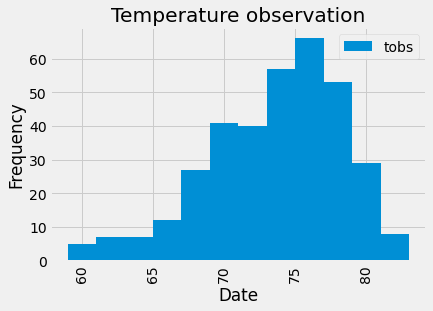

In [106]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_result = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= last_year,Measurement.station == most_active).all()
station_result

station_df = pd.DataFrame(station_result,columns = ["Date","Temperature"])


# Sort the dataframe by date
station_sorted_df = station_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
station_sorted_df.hist(column = "Temperature",bins=12)
plt.xticks(rotation = 90);
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Temperature observation")
plt.legend(['tobs'],loc="upper right")


# Close session

In [16]:
# Close Session
session.close()
